In [87]:
!git init
!git remote add origin https://github.com/pythonjeff/BTCmorning.git

Reinitialized existing Git repository in /Users/jeffreylarson/Desktop/.git/
error: remote origin already exists.


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
df = pd.read_csv("BTC-USD(1).csv", index_col="Date")

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


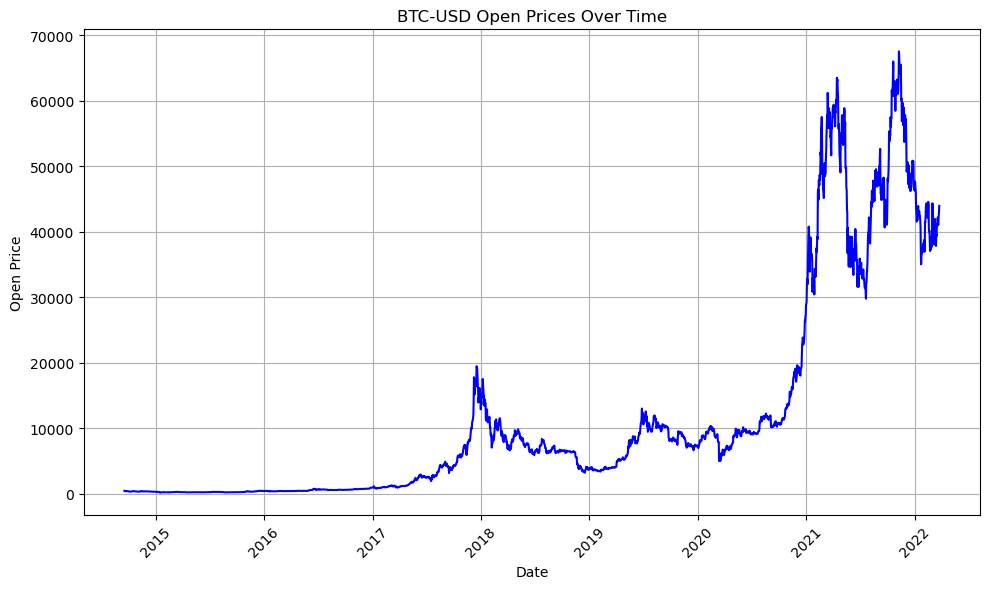

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

df.index = pd.to_datetime(df.index)

# Create a line plot instead of scatter plot for better visualization of trends
ax.plot(df.index, df["Open"], label="Open Price", color="blue")

ax.xaxis.set_major_locator(mdates.YearLocator())  # Set ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines to make it easier to read values
ax.grid(True)

# Adding labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Open Price")
ax.set_title("BTC-USD Open Prices Over Time")

plt.tight_layout() 
plt.show()

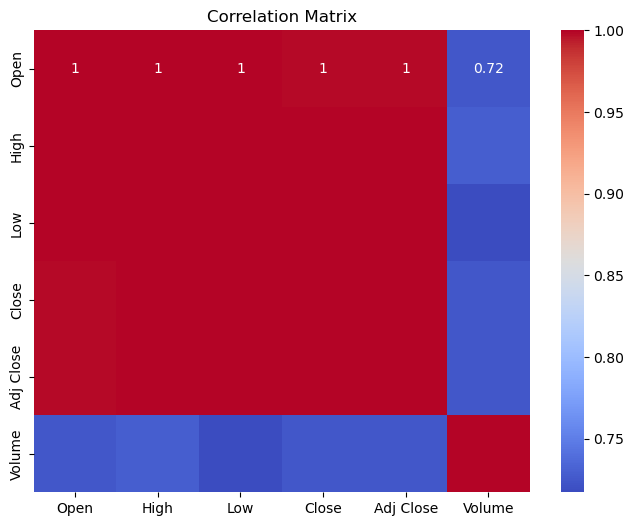

In [29]:
#find correlations

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

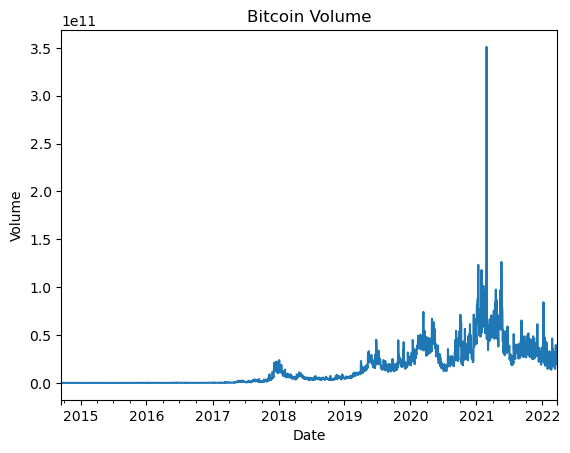

In [31]:
#volume analysis

df['Volume'].plot()
plt.title("Bitcoin Volume")
plt.xlabel("Date")
plt.ylabel("Volume")

plt.show()

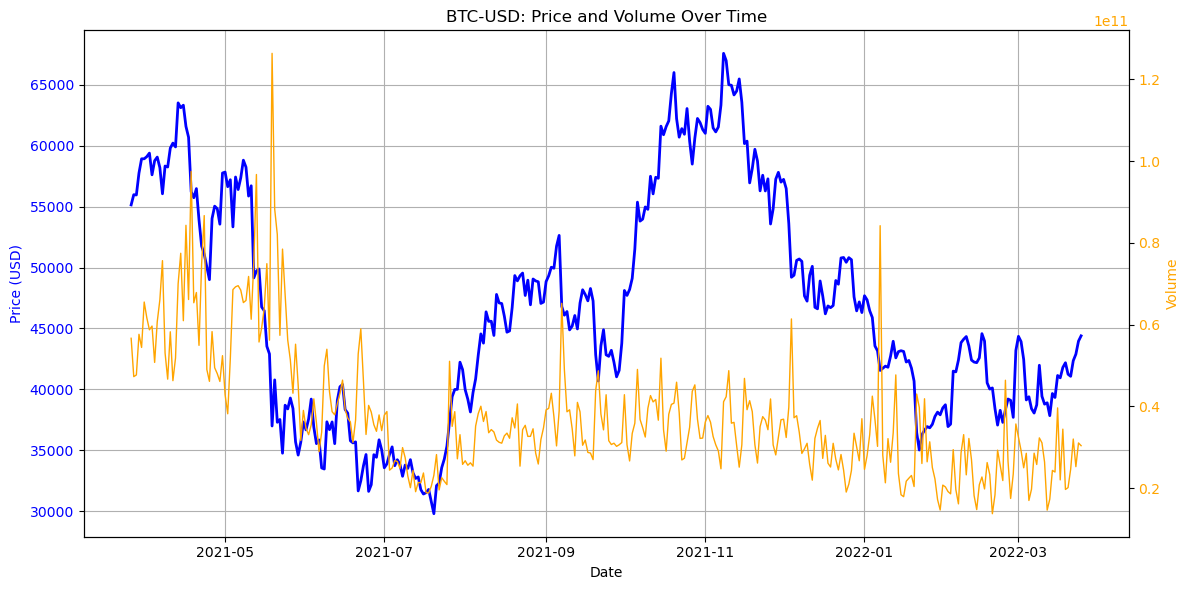

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 6))

df_last_year = df.tail(365)

# Plot the closing price with a line plot
ax1.plot(df_last_year.index, df_last_year['Close'], color='blue', linewidth=2, label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis to plot volume
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.plot(df_last_year.index, df_last_year['Volume'], color='orange', linewidth=1, label='Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title
plt.title('BTC-USD: Price and Volume Over Time')

# Add gridlines for readability
ax1.grid(True)

# Show the plot with tight layout to avoid overlap
fig.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [42]:
X = df[['Volume']].values  # Volume as the feature
y = df['Close'].values  # Close price as the target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Mean Squared Error: 1.0736386907207501e+29
R-squared: -4.883891673135941e+20


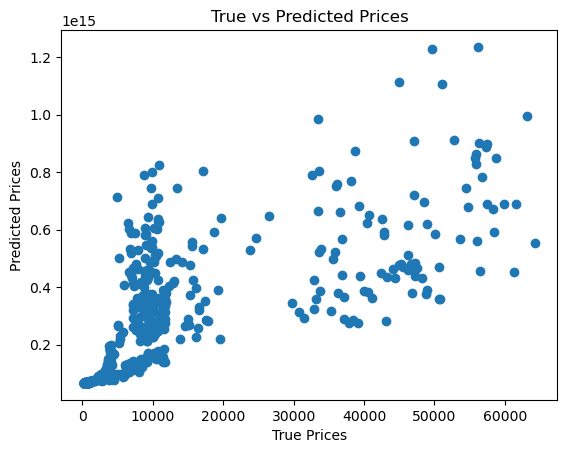

In [74]:
# Predict on the test data using scaled features
y_pred_scaled = model.predict(X_test_scaled)

# If you scaled the target variable, inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optionally, plot the true vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Prices")
plt.show()

In [77]:
example_volume = np.array([[30]])  # Replace with a specific volume value
predicted_price = model.predict(example_volume)

print(f"Predicted Closing Price: {predicted_price[0]}")


Predicted Closing Price: 371634.85286147613


In [86]:
!git add "BTC - USD.ipynb"
!git commit -m "Updated notebook with latest changes"
!git push origin main

On branch main
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Jeff Budget.xlsx
	deleted:    Jeffrey Larson Resume 2023.docx
	deleted:    Jeffrey Larson Resume 2024.docx
	deleted:    PB Confidential.xlsx

no changes added to commit (use "git add" and/or "git commit -a")
remote: Repository not found.
fatal: repository 'https://github.com/pythonjeff/BTCmorning.git/' not found
